## Heart Disease Detection

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import random

### Reading the dataset

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


The Correlation between Cholesterol and Blood Pressure is:              Cholesterol  RestingBP
Cholesterol     1.000000   0.100893
RestingBP       0.100893   1.000000


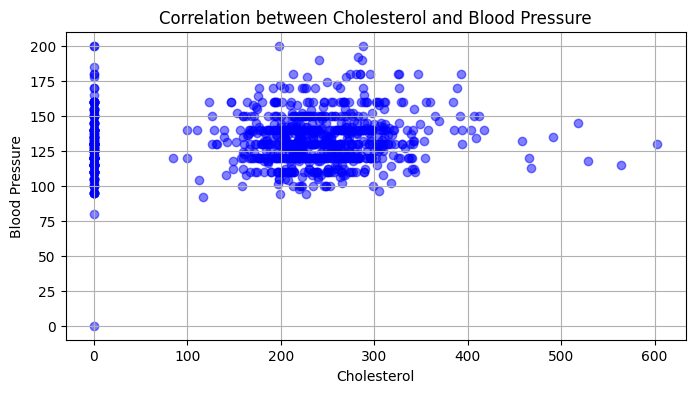

In [ ]:
correlation_df = df[["Cholesterol","RestingBP"]]
correlation = correlation_df.corr()
print(f"The Correlation between Cholesterol and Blood Pressure is: {correlation}")
plt.figure(figsize = (8,4))
plt.scatter(x = "Cholesterol", y = "RestingBP", data = correlation_df, color = "blue", alpha = 0.5)
plt.title("Correlation between Cholesterol and Blood Pressure")
plt.xlabel("Cholesterol")
plt.ylabel("Blood Pressure")
plt.grid(True)
plt.show()


### Feature Engineering

In [ ]:
age_groups = pd.cut(df["Age"], bins = [0,30,40,50,60,70,80], labels = ["30","30-40","40-50","50-60","60-70","70-80"])
heart_disease_count = df[df["HeartDisease"] == 1].groupby([age_groups, "Sex"]).size().unstack()
most_common_chest_pain = df.groupby(age_groups)["ChestPainType"].apply(lambda x : x.mode().iloc[0])
average_hr_by_age = df.groupby(age_groups)["MaxHR"].mean()

In [ ]:
print("Heart disease and most common chest pain type by age group and gender")
print(pd.concat([heart_disease_count,most_common_chest_pain,average_hr_by_age],axis = 1))

Heart disease and most common chest pain type by age group and gender
        F    M ChestPainType       MaxHR
Age                                     
30      0    0           ATA  177.400000
30-40   4   28           ASY  155.056818
40-50   7   86           ASY  144.757848
50-60  20  202           ASY  134.291339
60-70  18  127           ASY  125.609137
70-80   1   15           ASY  119.500000


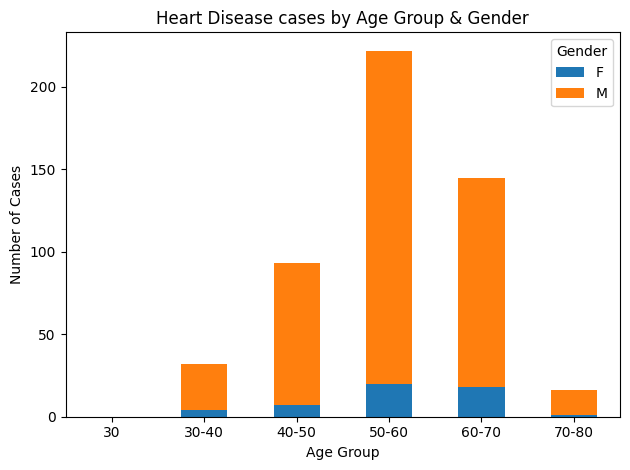

In [ ]:
heart_disease_count.plot(kind = "bar", stacked = True)
plt.title("Heart Disease cases by Age Group & Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Cases")
plt.xticks(rotation = 0)
plt.legend(title = "Gender")
plt.tight_layout()
plt.show()

Based on this data the Heart Disease cases are mostly seem in the age group of 50 - 60 and is seen more in males as compared to the females

In [ ]:
df_encoder = df.copy()
df_encoder.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Label Encoding

In [ ]:
label_encoder = LabelEncoder()
df_encoder["Sex"] = label_encoder.fit_transform(df_encoder["Sex"])
df_encoder["ChestPainType"] = label_encoder.fit_transform(df_encoder["ChestPainType"])
df_encoder["RestingECG"] = label_encoder.fit_transform(df_encoder["RestingECG"])
df_encoder["ExerciseAngina"] = label_encoder.fit_transform(df_encoder["ExerciseAngina"])
df_encoder["ST_Slope"] = label_encoder.fit_transform(df_encoder["ST_Slope"])

In [ ]:
x = df_encoder.drop("HeartDisease", axis = 1)
y = df_encoder["HeartDisease"]

### Using Random forest to get important features

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x,y)

RandomForestClassifier()

In [ ]:
feature_importance = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({"Features":x.columns,"Importances":feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = "Importances", ascending = False)
print(feature_importance_df)

          Features  Importances
10        ST_Slope     0.232394
2    ChestPainType     0.116685
7            MaxHR     0.112504
9          Oldpeak     0.110155
4      Cholesterol     0.107383
8   ExerciseAngina     0.085289
0              Age     0.076980
3        RestingBP     0.072114
1              Sex     0.034189
6       RestingECG     0.026816
5        FastingBS     0.025491


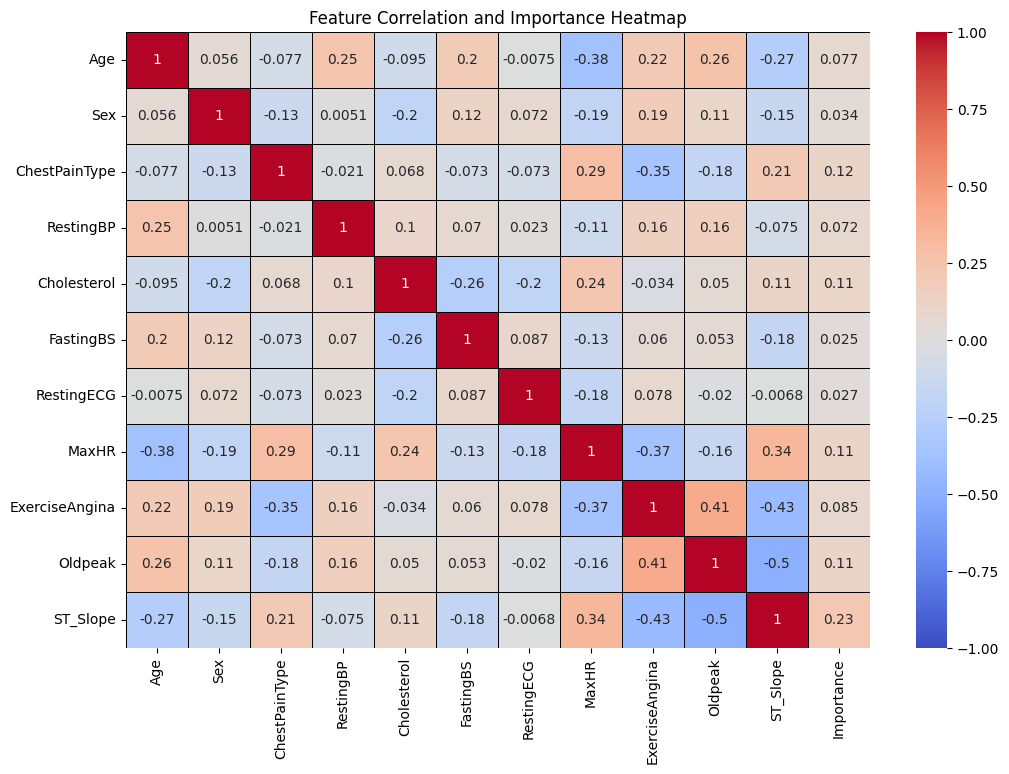

In [ ]:
corr_matrix = x.corr()
importances_matrix = pd.DataFrame(corr_matrix)
importances_matrix["Importance"] = feature_importance
plt.figure(figsize = (12,8))
sns.heatmap(importances_matrix, annot = True, cmap = "coolwarm", vmin = -1, vmax =1, center = 0, linewidth = 0.5, linecolor = "black" )
plt.title("Feature Correlation and Importance Heatmap")
plt.show()

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
x = df.drop("HeartDisease", axis = 1)
y = df["HeartDisease"]

In [ ]:
category = {
    "ChestPainType" : ['ATA', 'NAP', 'ASY', 'TA'],
    "Sex" : ['M', 'F'],
    "RestingECG" : ['Normal', 'ST', 'LVH'],
    "ExerciseAngina" : ['Y', 'N'],
    "ST_Slope" : ['Up', 'Flat', 'Down']
}

x = pd.get_dummies(x, columns = category.keys())

In [ ]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Logistic Regression to detect Heart Disease

In [ ]:
logistic_cf = LogisticRegression()
logistic_cf.fit(x_train, y_train)

In [ ]:
def get_user_input():
  age = int(input("Enter age:"))
  sex = input("Enter sex (M/F):").upper()
  chest_pain_type = input("Enter chest pain type (ATA/NAP/ASY/TA):")
  resting_bp = int(input("Enter your resting blood pressure:"))
  cholesterol = int(input("Enter your cholesterol level:"))
  fasting_bs = int(input("Enter your fasting blood sugar level (0/1):"))
  resting_ecg = input("Enter your resting ECG (Normal/ST/LVH):")
  max_hr = int(input("Enter your maximum heart rate:"))
  exercise_angina = input("Enter your exercise angina (Y/N):")
  oldpeak = float(input("Enter your oldpeak value:"))
  st_slope = input("Enter your ST slope (Up/Flat/Down):")

  return {
      "Age": age,
      "Sex": sex,
      "ChestPainType": chest_pain_type,
      "RestingBP": resting_bp,
      "Cholesterol": cholesterol,
      "FastingBS": fasting_bs,
      "RestingECG": resting_ecg,
      "MaxHR": max_hr,
      "ExerciseAngina": exercise_angina,
      "Oldpeak": oldpeak,
      "ST_Slope": st_slope
  }


In [ ]:
patient_data = get_user_input()
patient_df = pd.DataFrame([patient_data])
patient_df = pd.get_dummies(patient_df, columns = category.keys())
missing_features = set(x_train.columns) - set(patient_df.columns)
for feature in missing_features:
    patient_df[feature] = 0
patient_df = patient_df[x_train.columns]

predictions = logistic_cf.predict(patient_df)
if predictions[0] == 1:
  print("Heart Disease Detected")
else:
  print("Normal")

Enter age:35
Enter sex (M/F):M
Enter chest pain type (ATA/NAP/ASY/TA):ATA
Enter your resting blood pressure:160
Enter your cholesterol level:211
Enter your fasting blood sugar level (0/1):1
Enter your resting ECG (Normal/ST/LVH):ST
Enter your maximum heart rate:115
Enter your exercise angina (Y/N):N
Enter your oldpeak value:2.6
Enter your ST slope (Up/Flat/Down):Down
Heart Disease Detected


### Random Forest to detect Heart Disease

In [ ]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
random_data = {
    "Age": np.random.randint(20, 80),
    "Sex": np.random.choice(category["Sex"]),
    "ChestPainType": np.random.choice(category["ChestPainType"]),
    "RestingBP": np.random.randint(100, 200),
    "Cholesterol": np.random.randint(100,300),
    "FastingBS": np.random.choice([0,1]),
    "RestingECG": np.random.choice(category["RestingECG"]),
    "MaxHR": np.random.randint(60,220),
    "ExerciseAngina": np.random.choice(category["ExerciseAngina"]),
    "Oldpeak": np.random.uniform(0,5),
    "ST_Slope": np.random.choice(category["ST_Slope"]),
}

random_df = pd.DataFrame([random_data])
random_df = pd.get_dummies(random_df, columns = category.keys())
missing_features = set(x_train.columns) - set(random_df.columns)
for feature in missing_features:
    random_df[feature] = 0
random_df = random_df[x_train.columns]


In [ ]:
random_prediction = classifier_rf.predict(random_df)

def print_features(ranndom_data):
  for feature, value in random_data.items():
    print(f"{feature}: {value}")
print("Randomly Generated Patient data")
print_features(random_data)
if random_prediction[0] == 1:
  print("Heart Disease Detected")
else:
  print("Normal")

Randomly Generated Patient data
Age: 57
Sex: F
ChestPainType: TA
RestingBP: 133
Cholesterol: 248
FastingBS: 0
RestingECG: ST
MaxHR: 155
ExerciseAngina: Y
Oldpeak: 3.8622516670434557
ST_Slope: Down
Heart Disease Detected
